<a href="https://colab.research.google.com/github/TadaoYamaoka/ShogiAIBook2/blob/main/notebook/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ランタイムタイプの確認

「ランタイム」－「ランタイムのタイプを変更」から、「ハードウェア アクセラレータ」が「GPU」になっていることを確認します。なっていない場合、「GPU」に変更します。

## CUDAバージョンの確認

In [1]:
!nvidia-smi

Mon Nov 22 15:40:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## タイムゾーンの変更

In [3]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Asia/Tokyo /etc/localtime
!date

Tue Nov 23 00:40:23 JST 2021


## 共有アイテムのショートカット作成

* 共有リンクを開く
  * [ShogiAIBookData](https://drive.google.com/drive/folders/13XZ-VQ58QoIJBZAg0RPM44-etsJtZNAG?usp=sharing)


* Google Drive の「共有アイテム」>「ShogiAIBookData」を右クリックする
* 「ドライブにショートカットを追加」をクリックする
> 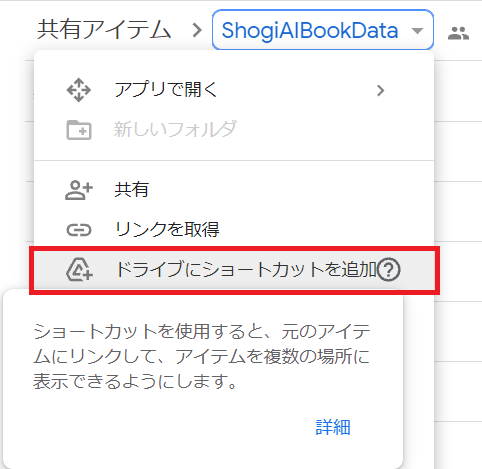

* 「ショートカットを追加」をクリックする
> 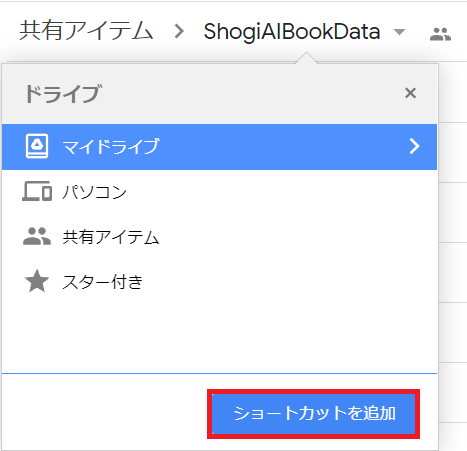

* 以降の手順は、「マイドライブ」直下に、ショートカットを設置した場合を想定する

### Tips
* Colab 以外の環境では、Google Drive からダウンロードするよりも、[rclone](https://rclone.org/) でデータをコピーする方が速く、確実です。
 * [install](https://rclone.org/install/)
 * [Google Drive](https://rclone.org/drive/)


# Google Drive のマウント

In [4]:
# [Go to this URL in a browser:] -> [https://accounts.google.com/o/oauth2/auth?client_id=xxxxx ...] のリンクをクリックし、ログインする
# [Enter your authorization code:] -> 「このコードをコピーし、アプリケーションに切り替えて貼り付けてください。」のコードをコピーし、ペーストする

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* ```https://accounts.google.com/o/oauth2/auth?client_id=xxxxx ...``` のリンクをクリックする
> 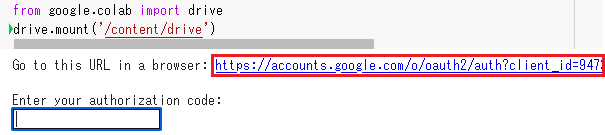

* 「Google Drive」を利用するアカウントをクリックする
> 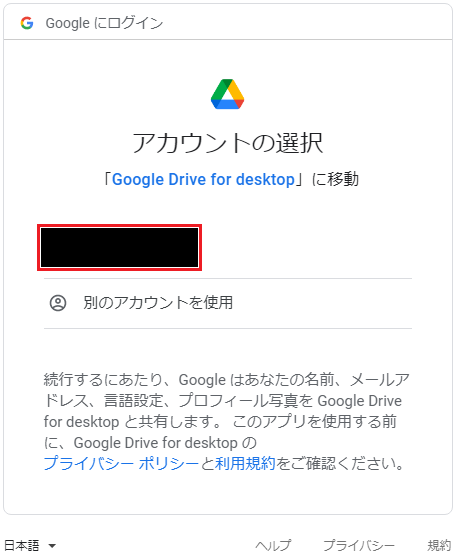

* 「ログイン」をクリックする
> 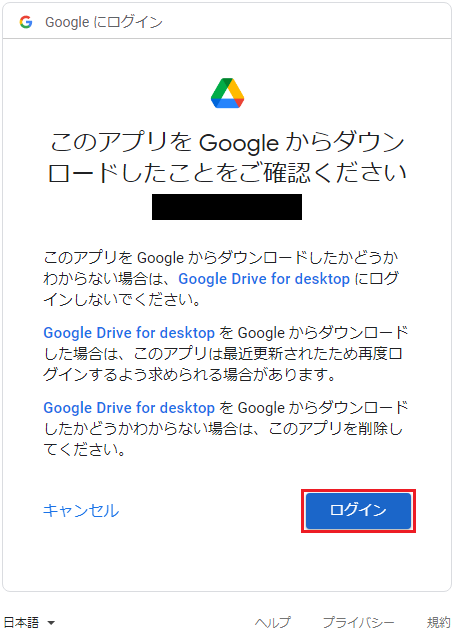

* 「コード」をコピーする
> 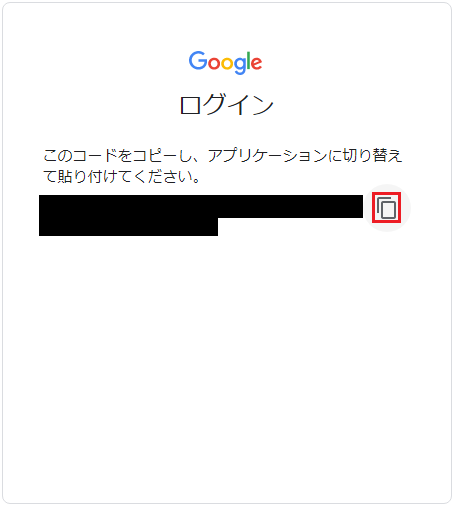

* ```Enter your authorization code:``` の入力欄にペーストし、「Enter」キーを押下する
> 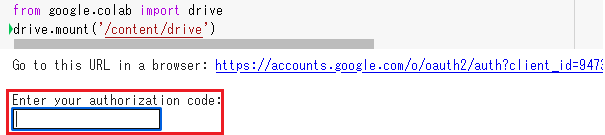

In [5]:
!ls -ld "/content/drive/My Drive/"

drwx------ 18 root root 4096 Nov 23 00:40 '/content/drive/My Drive/'


# dlshogiのインストール

## pip でインストールする場合

In [6]:
# pip でインストールする場合
!pip install dlshogi==0.1.1

     |████████████████████████████████| 3.3 MB 15.2 MB/s 


## GitHub のソースからインストールする場合

GitHubのソースを変更して試したい場合は、ソースからインストールすることもできます。コメントアウトしているため、コメントを外して実行してください。git cloneはどちらか必要な方のコメントを外してください。

In [1]:
%%bash
# GitHub のソースから、最新版をインストールする場合
#git clone https://github.com/TadaoYamaoka/DeepLearningShogi.git

# GitHub のソースから、v0.1.1をインストールする場合
#git clone https://github.com/TadaoYamaoka/DeepLearningShogi.git -b v0.1.0

#cd DeepLearningShogi
#pip install -e .

Obtaining file:///content/DeepLearningShogi
  Running setup.py develop for dlshogi


Cloning into 'DeepLearningShogi'...


GitHubのソースからインストールした場合は、環境変数PATHを通します。下記のログの可視化のために、ノートブック上でdlshogi.utilsをインポートするために必要です。

In [ ]:
# 環境変数PATHを通す
#import sys
#sys.path.append('/content/DeepLearningShogi')

# 作業ディレクトリの作成

In [ ]:
!mkdir -p /content/ShogiAIBook
!mkdir -p "/content/drive/My Drive/ShogiAIBook"
!mkdir -p "/content/drive/My Drive/ShogiAIBook/model"
!mkdir -p "/content/drive/My Drive/ShogiAIBook/log"

# シンボリックリンクの作成

In [ ]:
%cd /content/ShogiAIBook

/content/ShogiAIBook


In [ ]:
!ln -s "/content/drive/My Drive/ShogiAIBook/log"   ./log
!ln -s "/content/drive/My Drive/ShogiAIBook/model" ./model
!ln -s "/content/drive/My Drive/ShogiAIBookData"   ./data

# データの確認

In [ ]:
!ls -ld ./data/*

-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-001.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-002.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-003.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-004.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-005.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-006.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-007.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-008.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-009.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-010.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-011.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data/dlshogi_with_gct-012.hcpe
-rw------- 1 root root 356250760 Sep 10 23:39 ./data

# 学習

学習用のシェルスクリプト(train.sh)を作成します。

In [ ]:
%%writefile train.sh
#!/bin/bash

# 学習するエポックの閾値の上限値。72エポック（24分割した教師データ*3サイクル）学習する。
last=72

# 引数がある場合は上書きする
if [ $# -ge 1 ]; then
    last=$(($1))
fi

# 変数設定
name="resnet10_swish"
log_dir="./log"
model_dir="./model"
data_dir="./data"

# 最新のチェックポイント+1から学習を再開する。
for i in $(ls -v ${model_dir}/checkpoint_${name}-???.pth 2>/dev/null); do chkp=$i; done
if [ -v chkp ]; then
    start=$(expr ${chkp: -7:3} + 1)
else
    start=1
fi

for ((i=$start; i<=$last; i++)); do
    iii=$(printf "%03d" $i)
    jjj=$(printf "%03d" $((i-1)))
    kkk=$(printf "%03d" $(((i-1) % 24 + 1)))

    # floodgate、水匠3改、dlshogi_with_gctの教師データ（24分割）を順番に学習する。
    src="${data_dir}/floodgate_2019-2021_r3500-${kkk}.hcpe ${data_dir}/suisho3kai-${kkk}.hcpe ${data_dir}/dlshogi_with_gct-${kkk}.hcpe"

    # チェックポイントが存在する場合、最新のチェックポイントから学習を継続する。
    if [ $i -eq 1 ]; then
        resume=""
    else
        resume="-r ${model_dir}/checkpoint_${name}-${jjj}.pth"
    fi

    # 最終エポックの学習のみモデルファイルを保存する。
    if [ $i -eq $last ]; then
        model="--model ${model_dir}/model_${name}-{epoch:03}"
    else
        model=""
    fi

    # チェックポイントファイル名
    checkpoint="${model_dir}/checkpoint_${name}-{epoch:03}.pth"

    # ログファイル名
    log="${log_dir}/${name}-${iii}.txt"

    # 前回中断時のログファイルがある場合、削除する。
    if [ -e ${log} ]; then
        rm -f ${log}
    fi

    echo epoch ${i} start.

    # 学習
    python -m dlshogi.train                                            \
              ${src}                                                   \
              ${data_dir}/floodgate_test_2017-2018_r3500_eval5000.hcpe \
              --network ${name}                                        \
              ${resume}                                                \
              --checkpoint ${checkpoint}                               \
              ${model}                                                 \
              --lr_scheduler "StepLR(step_size=24,gamma=0.1)"          \
              --use_swa                                                \
              --swa_start_epoch 10                                     \
              --use_average                                            \
              --use_evalfix                                            \
              $2 $3 $4 $5 $6 $7 $8 $9 | tee ${log}
    if [ $? -ne 0 ]; then
        break
    fi
done

Writing train.sh


作成したシェルスクリプトに実行権を付与します。

In [ ]:
!chmod 755 train.sh

学習用シェルスクリプトを実行します。

割り当てられたGPUがK80の場合は、そのまま実行してください。

割り当てられたGPUがP100、T4もしくはV100の場合は、「# K80で学習する場合」の次の行をコメントアウトして、「# K80以外で学習する場合」の次の行のコメントを外して実行してください。

1 epochだけ試したい場合は、「# K80で学習する場合」の次の行をコメントアウトして、「1 epochだけ試したい場合」の次の行のコメントを外して実行してください。


In [ ]:
# K80で学習する場合
!./train.sh 72 --lr 0.01 --batchsize 1024 --eval_interval 100

# K80以外で学習する場合
#!./train.sh 72 --lr 0.04 --batchsize 4096 --use_amp

# 1 epochだけ試したい場合
#!./train.sh 1 --lr 0.01 --batchsize 1024 --eval_interval 100

epoch 61 start.
2021/11/01 07:11:47	INFO	network resnet10_swish
2021/11/01 07:11:47	INFO	batchsize=4096
2021/11/01 07:11:47	INFO	lr=0.04
2021/11/01 07:11:47	INFO	weight_decay=0.0001
2021/11/01 07:11:47	INFO	lr_scheduler StepLR(step_size=24,gamma=0.1)
2021/11/01 07:11:47	INFO	val_lambda=0.333
2021/11/01 07:11:56	INFO	use swa(swa_start_epoch=10, swa_freq=250, swa_n_avr=10)
2021/11/01 07:11:56	INFO	use amp
2021/11/01 07:11:56	INFO	use evalfix
2021/11/01 07:11:56	INFO	temperature=1.0
2021/11/01 07:11:58	INFO	Loading the checkpoint from ./model/checkpoint_resnet10_swish-060.pth
2021/11/01 07:11:58	INFO	optimizer SGD (Parameter Group 0 dampening: 0 initial_lr: 0.04 lr: 0.0004 momentum: 0.9 nesterov: True weight_decay: 0.0001)
2021/11/01 07:11:58	INFO	Reading training data
2021/11/01 07:12:00	INFO	./data/floodgate_2019-2021_r3500-013.hcpe, a=234.95542747972794
2021/11/01 07:12:02	INFO	./data/suisho3kai-013.hcpe, a=178.49315107658015
2021/11/01 07:12:10	INFO	./data/dlshogi_with_gct-013.hcpe, a

## 出力される警告
* 以下の警告については、学習が正常に行われていれば、問題ない。

> tcmalloc: large alloc xxxxxxxxxx bytes ...
* 教師データが多い場合に、[パフォーマンスツール](https://github.com/gperftools/gperftools) から出力される。
* 【参考】https://stackoverflow.com/questions/9077457/how-to-trace-tcmalloc-large-alloc

> FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. ...
* Inf or NaN が含まれている場合に、[PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html) から出力される。
* 【参考】https://discuss.pytorch.org/t/what-to-do-for-non-finite-warning-in-clip-grad-norm/127700


# ログの可視化

学習の精度をログから可視化します。学習をスキップした場合は、この手順はスキップしてください。

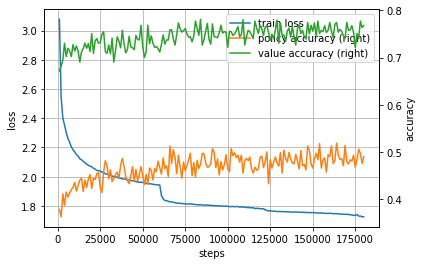

In [ ]:
# train
import dlshogi.utils
dlshogi.utils.plot_log_policy_value('./log/*.txt', '--grid')

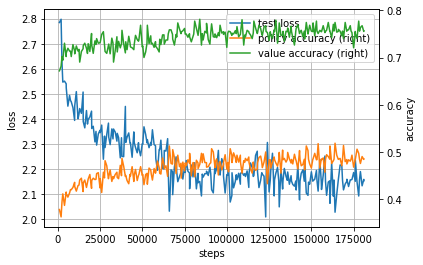

In [ ]:
# test
import dlshogi.utils
dlshogi.utils.plot_log_policy_value('./log/*.txt', '--testloss', '--grid')

# 学習済みファイルのコピー

学習をスキップした場合や1 epochだけ試した場合は、全て(72 epoch)学習したファイルをGoogleドライブからコピーしてください。コメントアウトしているため、コメントアウトを外して実行してください。

In [ ]:
#!cp ./data/model/checkpoint_resnet10_swish-072.pth ./model/
#!cp ./data/model/model_resnet10_swish-072 ./model/

# onnxモデル変換

In [ ]:
!python -m dlshogi.convert_model_to_onnx --network resnet10_swish ./model/model_resnet10_swish-072 ./model/model_resnet10_swish-072.onnx

graph(%input1 : Float(*, 62, 9, 9, strides=[5022, 81, 9, 1], requires_grad=0, device=cuda:0),
      %input2 : Float(*, 57, 9, 9, strides=[4617, 81, 9, 1], requires_grad=0, device=cuda:0),
      %l1_1_1.weight : Float(192, 62, 3, 3, strides=[558, 9, 3, 1], requires_grad=1, device=cuda:0),
      %l1_1_2.weight : Float(192, 62, 1, 1, strides=[62, 1, 1, 1], requires_grad=1, device=cuda:0),
      %l1_2.weight : Float(192, 57, 1, 1, strides=[57, 1, 1, 1], requires_grad=1, device=cuda:0),
      %l22.weight : Float(27, 192, 1, 1, strides=[192, 1, 1, 1], requires_grad=1, device=cuda:0),
      %l22_2.bias : Float(2187, strides=[1], requires_grad=1, device=cuda:0),
      %l23_v.weight : Float(256, 2187, strides=[2187, 1], requires_grad=1, device=cuda:0),
      %l23_v.bias : Float(256, strides=[1], requires_grad=1, device=cuda:0),
      %l24_v.weight : Float(1, 256, strides=[256, 1], requires_grad=1, device=cuda:0),
      %l24_v.bias : Float(1, strides=[1], requires_grad=1, device=cuda:0),
      %

In [ ]:
!ls -l ./model/model_resnet10_swish-072.onnx

-rw------- 1 root root 29379421 Nov  2 05:55 ./model/model_resnet10_swish-072.onnx
